In [1]:
import tensorflow as tf

In [2]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Conv2D, MaxPooling2D, Activation, Flatten, BatchNormalization
from tensorflow.keras import losses

In [3]:
import numpy as np

In [4]:
model = Sequential()

In [5]:
model.add(Conv2D(32, kernel_size=(3,3), strides=(1,1), padding='valid', activation='relu', input_shape=(28,28,1)))

In [6]:
model.add(BatchNormalization())

In [7]:
model.add(Conv2D(32, (3,3), strides=1, padding='valid', activation='relu'))

In [8]:
model.add(MaxPooling2D((2,2)))

In [9]:
model.add(Conv2D(64, (3,3), strides=1, padding='valid', activation='relu'))

In [10]:
model.add(BatchNormalization())

In [11]:
model.add(Conv2D(64, (3,3), strides=1, padding='valid', activation='relu'))

In [12]:
model.add(MaxPooling2D((2,2)))

In [13]:
model.add(Flatten())

In [14]:
model.add(Dense(256, activation='relu'))

In [15]:
model.add(Dense(10, activation='softmax'))

In [16]:
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

In [17]:
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
batch_normalization (BatchNo (None, 26, 26, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 24, 24, 32)        9248      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 12, 12, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 10, 10, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 10, 10, 64)        256       
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 8, 8, 64)          36928     
__________

In [18]:
mnist = tf.keras.datasets.mnist

(x_train, y_train),(x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
x_train = x_train.reshape(60000, 28, 28, 1)
x_test = x_test.reshape(-1, 28, 28, 1)
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [23]:
model.fit(x_train, y_train, batch_size=32, epochs=1, validation_data=(x_test,y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 10s 159us/step - loss: 0.0180 - acc: 0.9945 - val_loss: 0.0303 - val_acc: 0.9919


In [24]:
model_json = model.to_json()
with open("mnist_model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("mnist_model.h5")
print("Saved model to disk")

Saved model to disk


In [295]:
x_train, x_validate = np.split(x_train, [-10000], axis=0)

In [296]:
y_train, y_validate = np.split(y_train, [-10000], axis=0)

In [101]:
y_train

array([[0., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 1., 0.]], dtype=float32)

In [60]:
y_train.shape

(60000,)

In [70]:
model.layers

[]

4

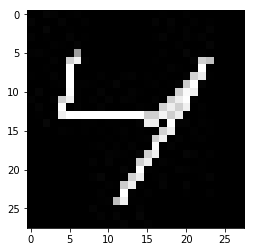

In [337]:
from PIL import Image
import matplotlib.pyplot as plt
im = Image.open('Digits.jpg').convert('L')
imarr = np.asarray(im)
imarr = imarr.reshape(28, 28, 1)
plt.imshow(imarr.reshape(28, 28), cmap='gray')
model.predict(imarr.reshape(1, 28, 28, 1))
np.argmax(model.predict(imarr.reshape(1, 28, 28, 1)))

3

In [323]:
y_validate.shape

(10000, 10)

In [324]:
x_train.shape

(50000, 28, 28, 1)